In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
images_path = '/content/drive/My Drive/DSO_570_Fall_2023/10_Intro_to_Optimization_Concrete_Formulation_and_CVXPY_The_Business_of_Banking_II/Images/'

## Verbal Interpretation of an Optimal Planning for Regulated Banks
<br>
<font size="+1">
    <ul>
        <li><b>Verbal Formulation/Description</b></li>
        <br>
        <li>As a starting point, we reduce a bank to its core activity, that is, <b>transforming short-term deposits into long-term loans.</b></li>
        <br>
        <li>This implies the balance sheet positions are <b>deposits</b>, D, and <b>loans</b>, L.</li>
        <br>
        <li>Loans may default, and deposits are exposed to early withdrawal.</li>
        <br>
        <ul>
            <li>In order to buffer against possible losses due to defaults, banks hold <b>capital</b>, C - which could be capital raised from selling bonds or selling equity, as well as buying financial instruments that hedge losses.</li>
            <br>
            <li>In order to buffer against possible early withdrawls on the deposits, the bank holds <b>reserves</b>, R - which could be less risky investments.</li>
            <br>
        </ul>
        <li>Together, the assets (<b>loans</b> and <b>reserves</b>) and liabilities (<b>deposits</b> and <b>capital</b>) make up this idealized bank's balance sheet.</li>
        <br>
        <li>In other words, total assets equal total liabilities</li>
        <br>
        <li><img src="Images/Bank_Simple_Balance_Sheet.png" width="300"></li>
        <br>
        <li><img src="https://cdn.corporatefinanceinstitute.com/assets/bank-balance-sheet.png" width="500"></li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li>Banks operating under Basel III regulation have to maintain four key ratios above some parameters, which vary per-constraint and per-bank:</li>
        <br>
        <ol>
            <li>a <b>capital ratio</b>, CR,</li>
            <br>
            <ul>
                <li>which prevents your loans from being too large relative to your capital in order to hedge against defaults,</li>
                <br>
                <li>the <b>capital ratio</b> is defined as the ratio of capital to loans, and must stay above $0.3$,</li>
                <br>
            </ul>
            <br>
            <li>a <b>leverage ratio</b>, LR,</li>
            <br>
            <ul>
                <li>which prevents your capital from from dropping too far below the total assets, i.e. prevents insolvency from asset value risk,</li>
                <br>
                <li>the <b>leverage ratio</b> is defined as the ratio of capital to total assets (which we can assume is $1$ by normalization), and must stay above $0.1$,</li>
                <br>
            </ul>
            <li>a <b>liquidity coverage ratio</b>, LCR,</li>
            <br>
            <ul>
                <li>which prevents early withdrawal of deposits, i.e. a run on the bank, and ensures you have enough reserves to handle early withdrawal,</li>
                <br>
                <li>the <b>liquidity coverage ratio</b> is defined as the ratio of reserves to deposits, and must stay above $0.25$,</li>
                <br>
            </ul>
            <li>a <b>net stable funding ratio</b>, NSFR,</li>
            <br>
            <ul>
                <li>which ensures loans will still be able to be made in the future, because not all the assets have been lent out, i.e. discourages over-lending,</li>
                <br>
                <li>the <b>net stable funding ratio</b> is defined as the ratio of some number ($0.3$) times deposits plus capital to loans; if that number is one, then the numerator is the total liabilities of the bank, and must stay above $0.7$.</li>
                <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <font color="blue"><li style="color:blue">We will also assume that the assets (liabilities) are in relative terms, that is, we normalize the total assets (total liabilities), which implies the total assets (total liabilities) sum to one.</li></font>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>In other words, the sum of deposits and capital is one and the sum of loans and reserves is one.</li>
            <br>
            <li>Equivalently, we can say that capital is one minus deposits and reserves is one minus loans.</li>
            <br>
            <li><b>This implies once we know the loans and deposits, we know the reserves and capital, and hence the whole balance sheet decomposition.</b></li>
            <br>
            <li>This is done for simplicity and convenience to help simplify the relations of the balance sheet variables.</li></font>
            <br>
        </ul>
        <li>The minimum ratio parameters are computed for each bank and depend on the likelihood (probability) of default of its loans, that is, the riskiness of its loans, as well as the probability of early withdrawals on deposits - <b>this is where ML and predictive analytics is used.</b> </li>
        <br>
        <li>These numbers are defined in a way that attempts to prevent assets dropping too low, or liabilities becoming too costly.</li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li>A reasonable assumption is that when designing a business strategy, a bank will seek to <b>maximize the income coming from its products</b>, in this instance, the bank's products are the deposits and loans.</li>
        <br>
        <ul>
            <li>Loans and deposits are products, and products earn revenue, and the revenue is coming from the bank's role as an intermediary.</li>
            <br>
            <li>Banks make money on loans, represented by some margin ( $3\%$ ), from the interest they receive for bearing default (and prepayment) risk.</li>
            <br>
            <li>Banks make money on deposits, represented by some margin ( $2\%$ ), from service charges and fees.</li>
            <br>
            <li>These fees vary based on the service, ranging from account fees (which can consist of monthly maintenance charges, minimum balance fees, overdraft fees, non-sufficient funds charges), safe deposit box fees, and late fees.</li>
            <br>
        </ul>
        <font color="red"><li style="color:red">The above verbal description of the problem is verbose, we will now try to make it succinct.</li></font>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <font color="red"><li style="color:red">What's our <b>objective</b>, <b>constraints</b>, <b>decision variables</b>, and <b>feasible region</b>?</li></font>
        <br>
        <ul style="color:red">
            <font color="red"><li><b>objective</b> - the bank wants to maximize its income, which is the total income generated from loans on the balance sheet with their margin of $3\%$, and from deposits on the balance sheet with their margin of $2\%$,</li>
            <br>
            <li><b>constraints</b> - these are the rules imposed by Basel III regulations and by the balance sheet</li>
            <br>
            <ol>
                <li><b>capital ratio</b> - is defined as the ratio of capital to loans, and must stay above $0.3$,</li>
                <br>
                <li><b>leverage ratio</b> - is defined as the ratio of capital to total assets (which we can assume is $1$ by normalization), and must stay above $0.1$,</li>
                <br>
                <li><b>liquidity coverage ratio</b> - is defined as the ratio of reserves to deposits, and must stay above $0.25$,</li>
                <br>
                <li><b>net stable funding ratio</b> - is defined as the ratio of some number ($0.3$) times deposits plus capital to loans; if that number is one, then the numerator is the total liabilities of the bank, and must stay above $0.7$,</li>
                <br>
                <li><b>balance sheet relationship</b> - total assets (loans and reserves) equals total liabilities (deposits and capital), and the sum of deposits and capital is one and the sum of loans and reserves is one; equivalently, we can say that capital is one minus deposits and reserves is one minus loans,</li></font>
                <br>
            </ol>
            <li><b>decision variables</b> - these control the business strategy of the bank; particularly, they are the variables that compose the bank's balance sheet</li>
            <br>
            <ul>
                <li><b>deposits</b> - which also controls the capital through the relationship: <i>capital is one minus deposits</i>, </li>
                <br>
                <li><b>loans</b> - which also controls the reserves through the relationship: <i>reserves is one minus loans</i>, </li>
                <br>
            </ul>
            <li><b>feasible region</b> - the set of all possible decision variables that don't violate the constraints.</li>
            <br>
        </ul>
        <font color="red"><li style="color:blue"><b>GOAL: Find the optimal decisions regarding the balance sheet proportions that maximizes a bank's income coming from its products, subject to meeting the balance-sheet constraints set by the Basel III regulations.</b></li></font>
        <br>
    </ul>
</font>

$\square$

## Concrete Analytical Interpretation of an Optimal Planning for Regulated Banks
<br>
<font size="+1">
    <ul>
        <li>What's our <b>objective</b>, <b>constraints</b>, <b>decision variables</b>, and <b>feasible region</b>?</li>
        <br>
        <ul>
            <li><b>objective</b> - the bank wants to maximize its income, which is the total income generated from loans on the balance sheet with their margin of $3\%$, and from deposits on the balance sheet with their margin of $2\%$,</li>
            <br>
            <ul>
                <font color="red"><li style="color:red">$$\text{maximize: } \ g(D, L) = \boxed{0.02 D + 0.03 L}, $$ where $g(D,L)$ is is the objective function we wish to maximize (total income) that depends on the decision variables $D$ and $L$</li></font>
                <br>
            </ul>
            <li><b>constraints</b> - these are the rules imposed by Basel III regulations and by the balance sheet</li>
            <br>
            <ol>
                <li><b>capital ratio</b> - is defined as the ratio of capital to loans, and must stay above $0.3$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{C}{L} \geq 0.3$$</li></font>
                    <br>
                </ul>
                <li><b>leverage ratio</b> - is defined as the ratio of capital to total assets (which we can assume is $1$ by normalization), and must stay above $0.1$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{C}{L+R} \geq 0.1$$</li></font>
                    <br>
                </ul>
                <li><b>liquidity coverage ratio</b> - is defined as the ratio of reserves to deposits, and must stay above $0.25$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{R}{D} \geq 0.25$$</li></font>
                    <br>
                </ul>
                <li><b>net stable funding ratio</b> - is defined as the ratio of some number ($0.3$) times deposits plus capital to loans; if that number is one, then the numerator is the total liabilities of the bank, and must stay above $0.7$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{0.3 D + C}{L} \geq 0.7$$</li></font>
                    <br>
                </ul>
                <li><b>balance sheet relationship</b> - total assets (loans and reserves) equals total liabilities (deposits and capital), and the sum of deposits and capital is one and the sum of loans and reserves is one; equivalently, we can say that capital is one minus deposits and reserves is one minus loans,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$L+R = D+C,\\$$
                        $$D+C = 1 \iff C = C(D) = 1 - D,\\$$
                        $$L+R = 1 \iff R = R(L) = 1 - L$$</li></font>
                    <br>
                </ul>
            </ol>
            <font color="red"><li style="color:red">The balance sheet relationships allow us to rewrite the four ratio constraints in terms of deposits and loans.</li></font>
            <br>
            <ol>
                <font color="red"><li style="color:red">$$\frac{C(D)}{L} \geq 0.3 \iff 1-D \geq 0.3L \iff \boxed{D + 0.3L \leq 1}$$</li>
                <br>
                <li style="color:red">$$\frac{C(D)}{L+R(L)} \geq 0.1 \iff \frac{1-D}{1} \geq 0.1 \iff \boxed{D \leq 0.9}$$</li>
                <br>
                <li style="color:red">$$\frac{R(L)}{D} \geq 0.25 \iff 1-L \geq 0.25D \iff \boxed{0.25D + L \leq 1}$$</li>
                <br>
                <li style="color:red">$$\frac{0.3 D + C(D)}{L} \geq 0.7 \iff 0.3D + 1 - D \geq 0.7L \iff \boxed{0.7D + 0.7L \leq 1}$$</li></font>
                <br>
            </ol>
            <li><b>decision variables</b> - these control the business strategy of the bank; particularly, they are the variables that compose the bank's balance sheet</li>
            <br>
            <font color="red"><li style="color:red">$$L, \ \underbrace{R}_{R(L)}, \ D, \ \underbrace{C}_{C(D)} \implies \boxed{L, \ D}$$</li></font>
        <br>
            <ul>
                <li><b>deposits</b> - which also controls the capital through the relationship: <i>capital is one minus deposits</i>, </li>
                <br>
                <font color="red"><li style="color:red">$$D$$</li></font>
        <br>
                <li><b>loans</b> - which also controls the reserves through the relationship: <i>reserves is one minus loans</i>, </li>
                <br>
                <font color="red"><li style="color:red">$$L$$</li></font>
        <br>
            </ul>
            <li><b>feasible region</b> - the set of all possible decision variables that don't violate the constraints.</li>
            <br>
            <font color="red"><li style="color:red">$$(D, L) \text{ satisfying the above constraints}$$</li></font>
        <br>
        </ul>
        <br>
        <li>This illustrates the power of concrete mathematical formulations!</li>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{10pt}$

<br>
<font size="+1">
    <ul>
        <li>Collecting our formulation from above, we get the following optimization problem, which represents an optimal business strategy for a company involved in banking activity that is regulated by Basel III.</li>
        <br>
        <li>\begin{align}
              \text{maximize: }  \ & g(D, L) =  & 0.02 D + 0.03 L & \\ \\
              \text{subject to: } \ & f_1(D, L) = & D + 0.3L  \leq 1 & \\
                                    & f_2(D, L) = & D  \leq 0.9 & \\
                                    & f_3(D, L) = & 0.25 D + L   \leq 1 & \\
                                    & f_4(D, L) = & 0.7 D + 0.7 L  \leq 1 & \\
                                     \end{align}</li>
        <br>
        <li>Solving this optimization problem yields optimal decision variables  
            $$(D^*, L^*).$$</li>
        <br>
    </ul>
</font>

## Abstract Analytical Interpretation of an Optimal Planning for Regulated Banks
<br>
<br>
<font size="+1" style="color:green">
    <ul>
        <font color="green"><li>Recall, in the abstraction stage, you are to identify patterns in the concrete formulation and rewrite the formulation into one that can be scaled to <b>arbitrary data</b>.</li>
        <br>
        <li>This step requires you to <i>mathematize</i> the problem by using abstract variables, index notation, and summation notation.</li></font>
        <br>
    </ul>
</font>
<br>
<font size="+1">
    <ul>
        <li>What's our <b>objective</b>, <b>constraints</b>, <b>decision variables</b>, and <b>feasible region</b>?</li>
        <br>
        <ul>
            <li><b>objective</b> - the bank wants to maximize its income, which is the total income generated from loans on the balance sheet with their margin of $m_L\%$, and from deposits on the balance sheet with their margin of $m_D\%$,</li>
            <br>
            <ul>
                <font color="red"><li style="color:red">$$\text{maximize: } \ g(D, L; m_D, m_L) = \boxed{m_D D + m_L L}, $$ where $g(D,L; m_D, m_L)$ is is the objective function we wish to maximize (total income) that depends on the decision variables $D$ and $L$ and depends on the <b>fixed, arbitrary</b> data $m_D, m_L$ representing the margin rates for the bank products</li></font>
                <br>
            </ul>
            <li><b>constraints</b> - these are the rules imposed by Basel III regulations and by the balance sheet</li>
            <br>
            <ol>
                <li><b>capital ratio</b> - is defined as the ratio of capital to loans, and must stay above $r_1$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{C}{L} \geq r_1$$</li></font>
                    <br>
                </ul>
                <li><b>leverage ratio</b> - is defined as the ratio of capital to total assets (which we can assume is $1$ by normalization), and must stay above $r_2$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{C}{L+R} \geq r_2$$</li></font>
                    <br>
                </ul>
                <li><b>liquidity coverage ratio</b> - is defined as the ratio of reserves to deposits, and must stay above $r_3$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{R}{D} \geq r_3$$</li></font>
                    <br>
                </ul>
                <li><b>net stable funding ratio</b> - is defined as the ratio of some number ($\alpha$) times deposits plus capital to loans; if that number is one, then the numerator is the total liabilities of the bank, and must stay above $r_4$,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$\frac{\alpha D + C}{L} \geq r_4$$</li></font>
                    <br>
                </ul>
                <li><b>balance sheet relationship</b> - total assets (loans and reserves) equals total liabilities (deposits and capital), and the sum of deposits and capital is one and the sum of loans and reserves is one; equivalently, we can say that capital is one minus deposits and reserves is one minus loans,</li>
                <br>
                <ul>
                    <font color="red"><li style="color:red">$$L+R = D+C,\\$$
                        $$D+C = 1 \iff C = C(D) = 1 - D,\\$$
                        $$L+R = 1 \iff R = R(L) = 1 - L$$</li></font>
                    <br>
                </ul>
            </ol>
            <font color="red"><li style="color:red">The balance sheet relationships allow us to rewrite the four ratio constraints in terms of deposits and loans.</li></font>
            <br>
            <ol>
                <font color="red"><li style="color:red">$$\frac{C(D)}{L} \geq r_1 \iff 1-D \geq r_1 L \iff \boxed{D + r_1 L \leq 1}$$</li>
                <br>
                <li style="color:red">$$\frac{C(D)}{L+R(L)} \geq r_2 \iff \frac{1-D}{1} \geq r_2 \iff \boxed{D \leq 1-r_2}$$</li>
                <br>
                <li style="color:red">$$\frac{R(L)}{D} \geq r_3 \iff 1-L \geq r_3 D \iff \boxed{r_3 D + L \leq 1}$$</li>
                <br>
                <li style="color:red">$$\frac{\alpha D + C(D)}{L} \geq r_4 \iff \alpha D + 1 - D \geq r_4 L \iff \boxed{(1-\alpha)D + r_4 L \leq 1}$$</li></font>
                <br>
            </ol>
            <li><b>decision variables</b> - these control the business strategy of the bank; particularly, they are the variables that compose the bank's balance sheet</li>
            <br>
            <font color="red"><li style="color:red">$$L, \ \underbrace{R}_{R(L)}, \ D, \ \underbrace{C}_{C(D)} \implies \boxed{L, \ D}$$</li></font>
        <br>
            <ul>
                <li><b>deposits</b> - which also controls the capital through the relationship: <i>capital is one minus deposits</i>, </li>
                <br>
                <font color="red"><li style="color:red">$$D$$</li></font>
        <br>
                <li><b>loans</b> - which also controls the reserves through the relationship: <i>reserves is one minus loans</i>, </li>
                <br>
                <font color="red"><li style="color:red">$$L$$</li></font>
        <br>
            </ul>
            <li><b>feasible region</b> - the set of all possible decision variables that don't violate the constraints.</li>
            <br>
            <font color="red"><li style="color:red">$$(D, L) \text{ satisfying the above constraints}$$</li></font>
        <br>
        </ul>
        <br>
        <li>This illustrates the power of abstract mathematical formulations!</li>
        <br>
    </ul>
</font>

$\square$

<br>
<font size="+1">
    <ul>
        <li>Collecting our formulation from above, we get the following optimization problem, which represents an optimal business strategy for a company involved in banking activity that is regulated by Basel III.</li>
        <br>
        <li>\begin{align}
              \text{maximize: }  \ & g(D, L; m_D, m_L) =  & m_D D + m_L L & \\ \\
              \text{subject to: } \ & f_1(D, L; r_1) = & D + r_1 L  \leq 1 & \\
                                    & f_2(D, L; r_2) = & D  \leq 1-r_2 & \\
                                    & f_3(D, L; r_3) = & r_3 D + L   \leq 1 & \\
                                    & f_4(D, L; \alpha, r_4) = & (1-\alpha) D + r_4 L  \leq 1 & \\
                                     \end{align}</li>
        <br>
        <li>Solving this optimization problem yields optimal decision variables that depend on data $(m_D, m_L, r_1, r_2, r_3, r_4, \alpha), \\$
            $$\left(D^*, \quad L^*\right) = \left(D^*(m_D, m_L, r_1, r_2, r_3, r_4, \alpha), \quad L^*(m_D, m_L, r_1, r_2, r_3, r_4, \alpha)\right).$$</li>
        <br>
    </ul>
</font>

$\square$

## Graphical Interpretation of an Optimal Planning for Regulated Banks
<br>
<font size="+1">
    <ul>
        <li>Because our formulation doesn't have parameters that are dependent on the size of the balance sheet, we are allowed to work with proportions of the balance sheet size and we can normalize the total assets and total liabilities to one. </li>
        <br>
        <li>This impled the following relations
        $$
        R(L) = 1 - L,
        $$ and
            $$
            C(D) = 1 - D,\\
            $$
            which allowed us to remove two of the four variables from $L, R, D, \text{ and } C$.
        </li>
        <br>
        <li>This means the bank's decision (control) variables are only the amount of loans, $L$, and deposits, $D$, they keep on their balance sheet.</li>
        <br>
        <li>Since there are only two decision variables, we can plot the <b>feasible set</b> that encodes the constraints in $(D, L)$ space.</li>
        <br>
    </ul>
</font>

$\square$

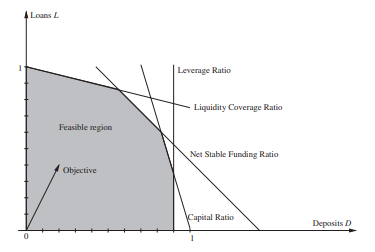

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'Basel_III_Constraints.png'))

<br>
<font size="+1">
    <ul>
        <li>In fact, any business strategy employed by a bank can be plotted in the $(D, L)$ space.</li>
        <br>
        <li>For example, if the bank functions as a <i>commercial bank</i>, then its business strategy can be represented as one of the corners of the feasible set at point $2$ which corresponds to having a balance sheet consisting of $90\%$ loans and $10\%$ reserves on the asset side, and $50\%$ deposits and $50\%$ capital on the liabilities side.</li>
        <br>
    </ul>
</font>

$\square$

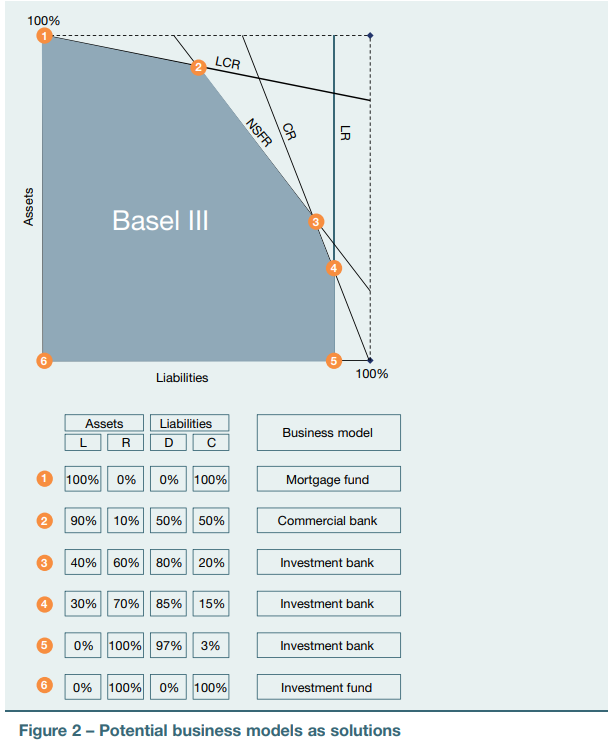

In [ ]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'Potential_Business_Model_Solutions.png'))

<br>
<font size="+1">
    <ul>
        <li>The best solution that satisfies all the constraints corresponds to one of the vertices on the feasible set.</li>
        <br>
        <li>This observation is a general fact in linear optimization</li>
        <br>
        <li>To find an optimal solution of a linear optimization problem, it suffices to restrict your search to vertices of the feasible region.</li>
        <br>
        <li>This geometric insight is the basis of an algorithm used to find optimal solutions known as the <i><a href="https://en.wikipedia.org/wiki/Simplex_algorithm#:~:text=The%20simplex%20algorithm%20begins%20at,form%20maximize%20subject%20to%20and">simplex method</a></i>, which goes from one vertex of the feasible region to an adjacent one with a better objective value until it reaches an <a href="https://optimization.cbe.cornell.edu/index.php?title=Simplex_algorithm">optimal solution</a>.</li>
        <br>
    </ul>
</font>

$\square$

## Two Decision Variables - Concrete Formulation
<br>
<font size="+1">
    <ul>
    </ul>
</font>

<br>
<font size="+1">
    <ul>
        <li>Recall our optimization formulation which represents an optimal business strategy for a company involved in banking activities that is regulated by Basel III.</li>
        <br>
        <li>\begin{align}
              \text{maximize: }  \ & g(D, L) =  & 0.02 D + 0.03 L & \\ \\
              \text{subject to: } \ & f_1(D, L) = & D + 0.3L  \leq 1 & \\
                                    & f_2(D, L) = & D  \leq 0.9 & \\
                                    & f_3(D, L) = & 0.25 D + L   \leq 1 & \\
                                    & f_4(D, L) = & 0.7 D + 0.7 L  \leq 1 & \\
                                     \end{align}</li>
        <br>
        <li>Solving this optimization problem yields optimal decision variables  
            $$(D^*, L^*).$$</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
import cvxpy as cp

In [ ]:
# loans, reserves, deposits, capital

loans = cp.Variable(1)
reserves = cp.Variable(1)
deposits = cp.Variable(1)
capital = cp.Variable(1)

In [ ]:
bank_objective = (0.02*deposits + 0.03*loans)

bank_objective

Expression(AFFINE, UNKNOWN, (1,))

In [ ]:
max_bank_objective = cp.Maximize(bank_objective)

max_bank_objective

Maximize(Expression(AFFINE, UNKNOWN, (1,)))

In [ ]:
optimal_balance_sheet_prob = cp.Problem(max_bank_objective,
                                        [deposits+0.3*loans <= 1,
                                        deposits <= 0.9,
                                        0.25*deposits + loans <= 1,
                                        0.7*deposits+0.7*loans <= 1])

optimal_balance_sheet_prob

Problem(Maximize(Expression(AFFINE, UNKNOWN, (1,))), [Inequality(Expression(AFFINE, UNKNOWN, (1,))), Inequality(Variable((1,))), Inequality(Expression(AFFINE, UNKNOWN, (1,))), Inequality(Expression(AFFINE, UNKNOWN, (1,)))])

In [ ]:
# This is a checker of if our problem is Disciplined Convex Programming
assert optimal_balance_sheet_prob.is_dcp()

In [ ]:
optimal_balance_sheet_prob.solve()

0.03714285709256796

In [ ]:
optimal_balance_sheet_prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Oct 14 05:34:50 AM: Your problem has 2 variables, 4 constraints, and 0 parameters.
(CVXPY) Oct 14 05:34:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 14 05:34:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 14 05:34:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 14 05:34:50 AM: Using cached ASA map, for faster compilation (bypassing reduction chain).
(CVXPY) Oct 14 05:34:50 AM: Finished problem compilation (took 

0.03714285709256796

In [ ]:
loans.value, reserves.value, deposits.value, capital.value

(array([0.85714285]), None, array([0.57142858]), None)

In [ ]:
reserves = 1 - loans.value

reserves

array([0.14285715])

In [ ]:
capital = 1 - deposits.value

capital

array([0.42857142])

<br>
<font size="+1">
    <ul>
        <li>This solution tells us that the bank should have $57.1\%$ of its liabilities in deposits and $42.9\%$ in capital, and it should have $85.7\%$ of its assets in loans and the remaining $14.3\%$ in liquidity reserves.</li>
        <br>
    </ul>
</font>

$\square$

## Two Decision Variables - Abstract Formulation
<br>
<font size="+1" style="color:green">
    <ul>
        <font color="green"><li>Recall, in the abstraction stage, you are to identify patterns in the concrete formulation and rewrite the formulation into one that can be scaled to <b>arbitrary data</b>.</li>
        <br>
        <li>This step requires you to <i>mathematize</i> the problem by using abstract variables, index notation, and summation notation.</li></font>
        <br>
    </ul>
</font>
<font size="+1">
    <ul>
        <li>For this, we need to use parameters!</li>
        <br>
    </ul>
</font>

<br>
<font size="+1">
    <ul>
        <li>Recall our optimization formulation which represents an optimal business strategy for a company involved in banking activities that is regulated by Basel III.</li>
        <br>
        <li>\begin{align}
              \text{maximize: }  \ & g(D, L; m_D, m_L) =  & m_D D + m_L L & \\ \\
              \text{subject to: } \ & f_1(D, L; r_1) = & D + r_1 L  \leq 1 & \\
                                    & f_2(D, L; r_2) = & D  \leq 1-r_2 & \\
                                    & f_3(D, L; r_3) = & r_3 D + L   \leq 1 & \\
                                    & f_4(D, L; \alpha, r_4) = & (1-\alpha) D + r_4 L  \leq 1 & \\
                                     \end{align}</li>
        <br>
        <li>Solving this optimization problem yields optimal decision variables that depend on data $(m_D, m_L, r_1, r_2, r_3, r_4, \alpha), \\$
            $$\left(D^*(m_D, m_L, r_1, r_2, r_3, r_4, \alpha), \quad L^*(m_D, m_L, r_1, r_2, r_3, r_4, \alpha)\right).$$</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
# loans, reserves, deposits, capital

loans=cp.Variable(1)
reserves=cp.Variable(1)
deposits=cp.Variable(1)
capital=cp.Variable(1)

In [ ]:
# instantiate parameters

m_D = cp.Parameter()
m_L = cp.Parameter()

r_1 = cp.Parameter()
r_2 = cp.Parameter()
r_3 = cp.Parameter()
r_4 = cp.Parameter()

alpha = cp.Parameter()

In [ ]:
bank_objective = (m_D*deposits + m_L*loans)

bank_objective

Expression(AFFINE, UNKNOWN, (1,))

In [ ]:
max_bank_objective = cp.Maximize(bank_objective)

max_bank_objective

Maximize(Expression(AFFINE, UNKNOWN, (1,)))

In [ ]:
optimal_balance_sheet_prob = cp.Problem(max_bank_objective,
                                        [deposits+ r_1*loans <= 1,
                                        deposits <= 1-r_2,
                                        r_3*deposits + loans <= 1,
                                        (1-alpha)*deposits+r_4*loans <= 1])

optimal_balance_sheet_prob

Problem(Maximize(Expression(AFFINE, UNKNOWN, (1,))), [Inequality(Expression(AFFINE, UNKNOWN, (1,))), Inequality(Variable((1,))), Inequality(Expression(AFFINE, UNKNOWN, (1,))), Inequality(Expression(AFFINE, UNKNOWN, (1,)))])

In [ ]:
# This is a checker of if our problem is Disciplined Convex Programming
assert optimal_balance_sheet_prob.is_dcp()

In [ ]:
# define the parameters

m_D.value = 0.02
m_L.value = 0.03

r_1.value = 0.3
r_2.value = 0.1
r_3.value = 0.25
r_4.value = 0.7

alpha.value = 0.3

In [ ]:
optimal_balance_sheet_prob.solve()

0.03714285709256796

In [ ]:
optimal_balance_sheet_prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Oct 14 05:37:30 AM: Your problem has 2 variables, 4 constraints, and 7 parameters.
(CVXPY) Oct 14 05:37:30 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 14 05:37:30 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 14 05:37:30 AM: Using cached ASA map, for faster compilation (bypassing reduction chain).
(CVXPY) Oct 14 05:37:30 AM: Finished problem compilation (took 5.779e-03 seconds).
-------------------------------------------------------------------------------
                                

0.03714285709256796

In [ ]:
loans.value, reserves.value, deposits.value, capital.value

(array([0.85714285]), None, array([0.57142858]), None)

In [ ]:
reserves = 1 - loans.value

reserves

array([0.14285715])

In [ ]:
capital = 1 - deposits.value

capital

array([0.42857142])